# Fittlyf-Internship-Work

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Default style and font sizes for our charts

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Part 1 - (FICO + Region)

Attached are two sample datasets: the first one is called FICO and it contains customer ids and individual FICO scores. The second one is named Region. It holds the same customer ids and regions where each customer is located.

# Task 1

You are tasked to explore the FICO dataset. Walk us through your process on the tasks below:

1.1 : You need to think about cleaning the data first. Common data problems include duplicates, missing, and errors in the data. Mark rows with data problems as “Missing” in the FICO column.
1.2 : Think about what you know about credit scores. Segment the FICO scores into 5 groups. Give your reasoning for the bucketing. Display the number of customers and percentage of each segment in your answer and create a histogram of the distribution if you are using Python.
1.3 : Do you notice anything particular about this distribution? Do you think this reflects what’s happening in the real world?

In [2]:
# Load the FICO dataset

fico_data = pd.read_csv("Downloads/fico.csv")
fico_data.sample(5)

,acct_id,FICO
7035,7031,842
18463,18459,850
39260,39248,761
97500,97488,850
5639,5635,747


In [3]:
# Shape of our dataset

fico_data.shape

(100013, 2)

In [4]:
# Basic information about dataset

fico_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100013 entries, 0 to 100012
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   acct_id  100013 non-null  int64 
 1   FICO     70398 non-null   object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [5]:
# Check for NA or missing values

fico_data.isna().sum()


acct_id        0
FICO       29615
dtype: int64

In [6]:
# Percetnage of Data Missing

fico_missing = (fico_data['FICO'].isna().sum()/fico_data.shape[0])*100
fico_missing.round(2)


29.61

In [7]:
# Check for number of unique values

fico_data.nunique()


acct_id    100000
FICO          377
dtype: int64

In [8]:
# Percetnage of Unique FICO Values 

fico_unique = (fico_data['FICO'].nunique()/fico_data.shape[0])*100
round(fico_unique,6)

0.376951

In [9]:
# What are those Unique Values ?

fico_data['FICO'].unique()

array(['768', '850', '677', '843', '796', '669', '805', '838', nan, '794',
       '832', '777', '809', '793', '746', '781', '812', '811', '849',
       '820', '778', '848', '821', '534', '844', '788', '696', '829',
       '740', '786', '802', '782', '816', '806', '828', '729', '751',
       '764', '808', '792', '831', '824', '727', '836', '775', '765',
       '735', '767', '839', '833', '807', '769', '715', '745', '803',
       '799', '847', '672', '823', '776', '797', '724', '845', '841',
       '693', '717', '754', '779', '565', '830', 'AA', '743', '825',
       '752', '770', '800', '772', '759', '670', '826', '570', '790',
       '817', '711', '678', '725', '842', '827', '710', '819', '700',
       '822', '623', '771', '705', '627', '835', '742', '655', '834',
       '762', '749', '753', '712', '798', '750', '837', '784', '737',
       '814', '748', '739', '686', '633', '671', '684', '552', '783',
       '756', '734', '703', '719', '720', '687', '801', '697', '553',
       '721', '7

In [10]:
# Error/Odd values we found except `nan` values

fico_data[fico_data['FICO'].isin(['AA','SSS'])]

,acct_id,FICO
133,134,AA
100011,99999,SSS


Note :

We can see that there's three odd values here [nan,AA,SSS] .
nan denotes a missing value so we can ignore that.
AA and SSS seem a little odd as FICO score, these can be considered as errors or maybe a special code given to certain customers. It's better to discuss with Domain Expert before ruling that out as an error.
Finally, maybe because of them this column has an Object data type rather than regular numbers.

In [11]:
# Check for duplicates 

dup_data = fico_data.duplicated(keep='first')
fico_data[dup_data]


,acct_id,FICO
140,140,752
190,189,745
192,190,828
194,191,752
196,192,850
30506,30501,773
30508,30502,798
30510,30503,820
30512,30504,NaN
30514,30505,820


In [12]:
# Cross Verify a Duplicate Value from the list

fico_data[fico_data['acct_id']==140]

,acct_id,FICO
139,140,752
140,140,752


In [13]:
# Numbers of Duplicate Values

fico_data[dup_data].shape[0]


13

Note :

We can see that there's 13 Duplicate values present in our datatset. We can safely remove them as they are just duplicates and we have the orignal intact in our dataset.


In [14]:
# Remove Duplicates

fico_data = fico_data[~dup_data]
fico_data.shape


(100000, 2)

In [15]:
# Replace NA values with `Missing`

fico_data['FICO'].fillna('Missing', inplace=True)

In [16]:
# Verify the 'Missing' lables

fico_data['FICO'].sample(5)


71726        789
61427    Missing
78145    Missing
87781    Missing
12335    Missing
Name: FICO, dtype: object

In [17]:
# Cross verify for Missing Values

fico_data.isna().sum()


acct_id    0
FICO       0
dtype: int64

Note :

We pre-processed our dataset looking for any missing values, duplicates and error values.
We found that 29615 values were missing in FICO column which is approx. 29.61 % of all data.
We found that there are 377 unique values in FICO column and out of which we have three odd values - [nan,AA,SSS] .
We checked for duplicate values and found 13 duplicate values in the datatset. We removed the duplicate values to clean our dataset.
Finally we replaced all the missing nan values with our defined variable Missing.


Task 1.2
Think about what you know about credit scores. Segment the FICO scores into 5 groups. Give your reasoning for the bucketing. Display the number of customers and percentage of each segment in your answer and create a histogram of the distribution if you are using Python.

FICO Score : https://www.forbes.com/advisor/credit-score/what-is-a-good-credit-score/

In [18]:
# We need to drop those values for Distributions & Graphs

new_fico_data = fico_data[~fico_data['FICO'].isin(['AA','SSS','Missing'])]


In [19]:
# Finally Convert Dtype `Object` to `Numberic`

new_fico_data['FICO'] = pd.to_numeric(new_fico_data['FICO'])


<ipython-input-19-d625849b11af>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_fico_data['FICO'] = pd.to_numeric(new_fico_data['FICO'])


In [20]:
# Cross Verify

new_fico_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 70386 entries, 0 to 100004
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   acct_id  70386 non-null  int64
 1   FICO     70386 non-null  int64
dtypes: int64(2)
memory usage: 1.6 MB


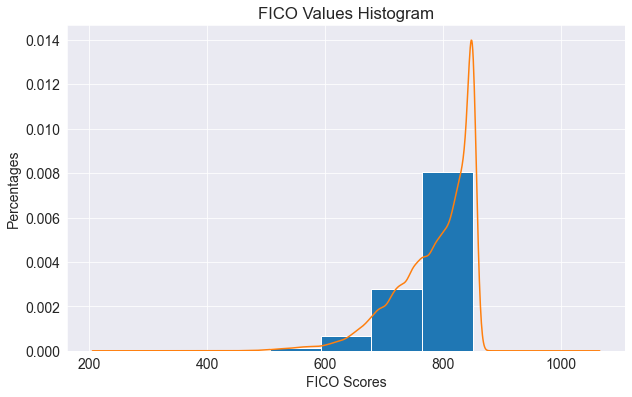

In [21]:
# Plot a Histogram for FICO Scores

ax = new_fico_data['FICO'].plot.hist(density=True, bins=5)
new_fico_data['FICO'].plot.density(ax=ax);
ax.set_title("FICO Values Histogram")
ax.set_ylabel('Percentages')
ax.set_xlabel('FICO Scores')
plt.show()


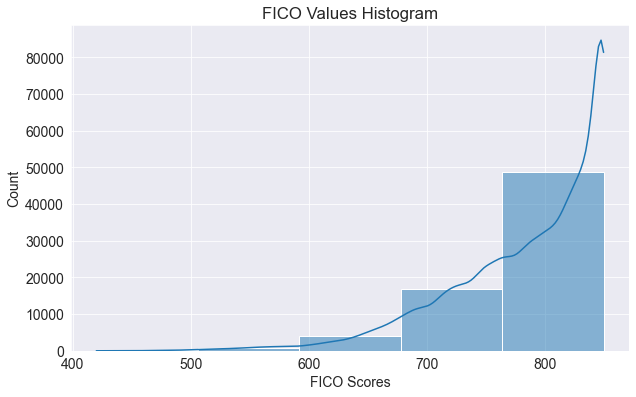

In [22]:
# Plot histogram and KDE with Seaborn

ax = sns.histplot(data=new_fico_data, x='FICO', kde=True, bins=5);
ax.set_title("FICO Values Histogram")
ax.set_ylabel('Count')
ax.set_xlabel('FICO Scores')
plt.show()


In [23]:
# Statistical Information

new_fico_data['FICO'].describe()

count    70386.000000
mean       785.747066
std         64.603625
min        420.000000
25%        749.000000
50%        804.000000
75%        839.000000
max        850.000000
Name: FICO, dtype: float64

In [24]:
print(f' Maximum Value : {new_fico_data["FICO"].max()}')
print(f' Maximum Value : {new_fico_data["FICO"].min()}')
print(f' In Between Range : {new_fico_data["FICO"].max() - new_fico_data["FICO"].min()}')
print(f' Average Bin Size (5 Bins) : {(new_fico_data["FICO"].max() - new_fico_data["FICO"].min())/5}')


 Maximum Value : 850
 Maximum Value : 420
 In Between Range : 430
 Average Bin Size (5 Bins) : 86.0


Note :

Option 1 : We can go for average bin size of 86.0 and have a equally spaced bin size.
Option 2 : We start from 400 and increrment at 100 points up to 900 so we'll have 5 bins coverening min and max values.
Option 3 : We can search online for the FICO scores and go with the critera provided by them.


In [25]:
# Sample Function for Categorising

def categorise_fico(dataset):
    """
    This function helps to categorise the data into 5 Bins - ['Excellent','Very Good','Good','Fair','Poor']
    """
    if dataset >= 800: # Condition 1
        return 'Excellent'
    if dataset >= 740 and dataset < 800: # Condition 2
        return 'Very Good'
    if dataset  >= 670 and dataset < 740: # Condition 3
        return 'Good'
    if dataset >= 580 and dataset < 670: # Condition 4
        return 'Fair'
    if dataset >= 300 and dataset < 580: # Condition 5
        return 'Poor'


Note : I decided to go with the data and average group size given by Forbes as FICO Chart

Link : https://www.forbes.com/advisor/credit-score/what-is-a-good-credit-score/

In [26]:
# Applying the functions to our Dataset

new_fico_data['Category'] = new_fico_data['FICO'].apply(categorise_fico)
new_fico_data.sample(10) # For Cross verification


<ipython-input-26-28230d77ce2a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_fico_data['Category'] = new_fico_data['FICO'].apply(categorise_fico)


,acct_id,FICO,Category
73726,73714,792,Very Good
7325,7321,711,Good
76046,76034,836,Excellent
32524,32512,843,Excellent
88808,88796,834,Excellent
96528,96516,834,Excellent
25187,25183,788,Very Good
46771,46759,731,Good
68048,68036,739,Good
88581,88569,800,Excellent


In [27]:
# Grouping through Fico Score Categories (Count)

table1 = new_fico_data.groupby(['Category']).count()[['FICO']].sort_values(by='FICO',ascending=False)
table1

,FICO
Category,
Excellent,36928
Very Good,18328
Good,10979
Fair,3398
Poor,753


In [28]:
# Percentages of Each Category

table2 = new_fico_data.groupby(['Category']).count()[["FICO"]].apply(lambda x: 100*x/x.sum())
table2 = table2.sort_values(by='FICO',ascending=False) # Sorting Values
table2


,FICO
Category,
Excellent,52.464979
Very Good,26.039269
Good,15.598272
Fair,4.827665
Poor,1.069815


In [29]:
# Count and Percantages Together

final_table = table1.merge(table2, how='inner', left_on='Category', right_on='Category')
final_table.columns = ['Total Count', 'Percentage'] # Renaming Columns
final_table

,Total Count,Percentage
Category,,
Excellent,36928,52.464979
Very Good,18328,26.039269
Good,10979,15.598272
Fair,3398,4.827665
Poor,753,1.069815


Task 1.3
Do you notice anything particular about this distribution? Do you think this reflects what’s happening in the real world?



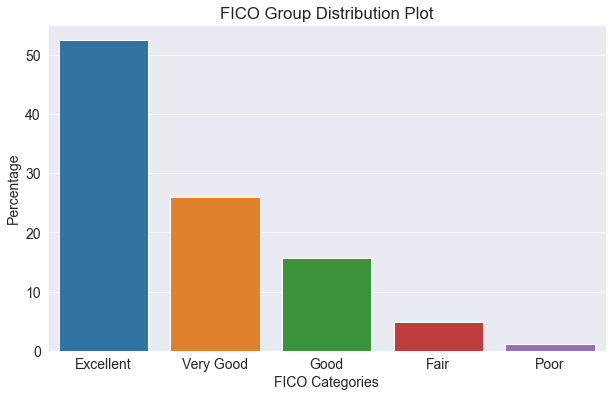

In [30]:
# Barplot for different categories
# X = Category Names
# Y = Category Percentages

ax = sns.barplot(x=final_table.index, y=final_table['Percentage']);
ax.set_title("FICO Group Distribution Plot")
ax.set_ylabel('Percentage')
ax.set_xlabel('FICO Categories')
plt.show()

Note : The graph seems completely opposite to the actual world value. Majority of people have low credit scores and a minority of people have very strong and excellent credit scores.

# Task 1 Summary

We pre-processed our dataset looking for any missing values, duplicates and error values.
We found that 29615 values were missing in the FICO column which is approx. 29.61 % of all data.
We found that there are 377 unique values in the FICO column and out of which we have three odd values - [nan,AA,SSS] .
We checked for duplicate values and found 13 duplicate values in the dataset. We removed the duplicate values to clean our dataset.
Finally we replaced all the missing nan values with our defined variable Missing.


I decided to go with the data and average group size given by Forbed as a FICO Chart.
Excellent : 800 & above
Very Good : 740-799
Good : 670-739
Fair : 580-669
Poor : 300-579


Link : https://www.forbes.com/advisor/credit-score/what-is-a-good-credit-score/
The graph and values belonging to the custom groups we built are completely opposite to the actual world value.

# Task 2

Now that you have a clean dataset for FICO.

2.1 : Create a temp table to store the information of FICO score and region for each customer. Make sure the customer id is the same for each record.
2.2 : Display the regions which have the second highest and lowest average FICO score. The result of your query should display only two rows showing the region and its average FICO score.
2.3 : Make sure you provide all the interim steps if needed in your final submission.


In [31]:
# Load the region datatset

region_data = pd.read_csv('Downloads/region.csv')
region_data.sample(5)

,acct_id,region
1155,1154,Los Angeles
41361,41274,Houston
1436,1435,San Diego
82722,82577,Charlotte
47157,47055,Phoenix


In [32]:
# Check for any missing values

region_data.isna().sum()

acct_id    0
region     0
dtype: int64

In [33]:
# Check for the Unique Values

region_data.nunique()


acct_id    100000
region         10
dtype: int64

In [34]:
# What are those uniqe values ?

region_data['region'].unique()


array(['New York', 'Dallas', 'Los Angeles', 'Chicago', 'Philadelphia',
       'San Antonio', 'Houston', 'Charlotte', 'Phoenix', 'San Diego'],
      dtype=object)

Task 2.1
Create a temp table to store the information of FICO score and region for each customer. Make sure the customer id is the same for each record.

In [35]:
# Merge FICO data and Region data

new_data = fico_data.merge(region_data, how='left', left_on='acct_id', right_on='acct_id')


Note :

We merged the region_data on fico_data with help of merge function.
With how we decided what kind of Join Type for the merge, left_on and right_on helps to fix the common column to use.


In [36]:
# Cross Verfiy our New Dataset

new_data.sample(10)

,acct_id,FICO,region
73748,73609,836,Philadelphia
89705,89547,850,Houston
29860,29801,850,Charlotte
87655,87498,815,Phoenix
14960,14939,Missing,Dallas
46536,46434,843,Philadelphia
50227,50122,697,Houston
93608,93446,Missing,Philadelphia
91733,91571,836,New York
90114,89955,824,Dallas


Task 2.2
Display the regions which have the second highest and lowest average FICO score. The result of your query should display only two rows showing the region and its average FICO score.



In [37]:
# Basic information about new dataset

new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100173 entries, 0 to 100172
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   acct_id  100173 non-null  int64 
 1   FICO     100173 non-null  object
 2   region   100173 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.3+ MB


In [38]:
### Formatting and Pre-Processing Merged Data

# Remove the Non Numerical Values
edited_data = new_data[~new_data['FICO'].isin(['AA','SSS','Missing'])]

# Convert dtype from `object ` to `integer`
edited_data['FICO'] = pd.to_numeric(edited_data['FICO'])

# Cross Verify the Transformed Data
edited_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 70559 entries, 0 to 100164
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   acct_id  70559 non-null  int64 
 1   FICO     70559 non-null  int64 
 2   region   70559 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


<ipython-input-38-39a6fed479d1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edited_data['FICO'] = pd.to_numeric(edited_data['FICO'])


In [39]:
# Grouping regions with Average FICO Socres

grouped_data = edited_data.groupby(['region']).mean()[['FICO']].sort_values(by='FICO',ascending=False)
grouped_data.columns = ['Average FICO Score'] #Renamingg Column
grouped_data # Descending Sorted Dataframe with Average FICO Scores


,Average FICO Score
region,
Phoenix,788.170231
Houston,786.005803
Philadelphia,785.773845
Los Angeles,785.689233
Chicago,785.643043
Charlotte,785.154280
New York,785.065903
San Antonio,784.508277
San Diego,784.076447


In [40]:
# To Show only second highest and lowest average FICO score

grouped_data.iloc[[1,-1],:] # Slciling Dataframe Data with `iloc` function

,Average FICO Score
region,
Houston,786.005803
Dallas,782.102021


# Task 2 : Summary

First we explored the FICO and region dataset for any missing or error values. Then we merged both the dataset with help of pandas.merge function.

We had to clean and trasnfrom the merged dataset for further use.
Finally we categorise the average FICO score with help of groupby function.
Second Highest : Houston - 786.00
Lowest : Dallas - 782.10

# Task 3

How many Red coloured top Honda SUV cars do you think will be sold in India in 2022?

Questions to consider:

I : What factors do you think will impact sales? You may google about guesstimate questions to answer this question better.
II : Assume you have all the data you need, what statistical methodology or algorithm will you use to make this sales forecast? Please give a brief explanation of why you choose this model.


III : How would you evaluate your model or determine its accuracy?

Pre-Requisite


Given :

Company : Honda
Car Type : Top SUV
Colour : Red
We are assuming domestic sales only.

Assumption :

Population of India : 140 Crore
Average Family Size : 4 People

Tier Share Percentage :
1.Metro/Tier I : 20%
2.Tier II/Tier III : 20%
3.Rural/Villages : 60%


Class Percentage Ratio in Each Tier :
1.Metro/Tier I : [Poor Class : 20% , Middle Class : 60% , Upper Class : 20% ]
2.Tier II/Tier III : [Poor Class : 40% , Middle Class :50% , Upper Class : 10% ]
3.Rural/Villages : [Poor Class : 60% , Middle Class :35% , Upper Class : 5% ]

Car Market Penetration :
1.Metro/Tier I : [Poor Class :00% , Middle Class :50% , Upper Class : 200% ]
2.Tier II/Tier III : [Poor Class :00% , Middle Class :25% , Upper Class : 100% ]
3.Rural/Villages : [Poor Class :00% , Middle Class :5% , Upper Class : 50% ]


# Car Type Distribution : [Hatchback :50% , Sedan :25% , SUV/MUV : 25% ]


Car Colour Distribution :
1.Major Colour : 75% [Black,White,Grey,Silver]
2.Minor Colour : 25% [Red,Orange,Blue,Maroon,Others]


1.We can assume the growth rate is 5%.
2.We can assume the average Car Life is of 20 years.
3.We can assumne Top SUV will be of 5% of 25% of SUV/MUV
4.We can assume Honda Brand Percentage in Market is close to 10% out of 100%.
5.We can assume 1/5th of total Minor Colour cars are Red.

Part 1 : Calculation of Total Cars Currently Present in 2022

Total House Hold = Population of India / Average Family Size

Total House Hold = 140 Crore / 4,
Total House Hold = 35 Crore

Sum of Penetration = Class Penetration Percentage x Class Tier Percentage + .....

1.Sum of Penetration (Metro/Tier I) = 0.0x0.2 + 0.5x0.6 + 2.0x2 = 0.70,
2.Sum of Penetration (Tier II/Tier III) = 0.0x0.4 + 0.25x0.5 + 1.0x0.1 = 0.23,
3.Sum of Penetration (Rural/Villages) = 0.0x0.6 + 0.05x0.35 + 0.5x0.05 = 0.04

House Hold Count = Tier Percentage * Total House Hold

1.Total House Hold (Metro/Tier I) = 0.2x35 = 7 Crore,
2.Total House Hold (Tier II/Tier III) = 0.2x35 = 7 Crore,
3.Total House Hold (Rural/Villages) = 0.6x35 = 21 Crore

Total Cars = Sum of Penetration * No of households in each segment



 Total Available = 0.7x7 + 0.23x7 + 0.04x21 = 7.8 Crore

# Part2 : Calculation of Top Red Honda SUV sold in 2022

As the question asks the number of top red honda car sold in 2022, that is essentially current year, we have to look at the reasons of purchase:

People buying cars due to replacement (as their old car is not working, is lost or stolen or any else reason),People buying cars as their first car


Cars to sell in current year = New cars due to replacement + New Demand due to growth



Growth rate = 5 Percent,Average Car Life = 20 years


Cars to sell = (Total Cars at Present / Average Life) + (Growth rate * Total Cars at Present)



Total Sell = (7.8/20) + (0.05x7.8) = 0.39 + 0.39 = 0.78 (approx 0.8 Crore)


Honda Car Share = Market Share Percentage x Cars To Sold



 Total Honda Cars = 0.1x0.8 = 0.08 Crore


Top Honda SUV Share = Top SUV Percentage x Total Honda Cars



Top Honda SUV Cars = 0.05x0.08 = 0.004 Crore or 0.4 Lakhs


Red Honda Share = Top Honda SUV Cars x Minor Percentage x 1/5th

Top Red Honda SUV Cars = 0.4x0.25x0.2 = 0.02 Lakhs or 2 Thousand

# Summary : Total Top Red Honda SUV to be sold in 2022 = Approx 2000 Units


# Task 3.1

What factors do you think will impact sales?



1.Economic Factors:-

Economic Conditions,
Gasoline Prices,
Interest Rates,
Inflation Rates

2.Technological Factors:-


Technological Change,
Environment Aspects,
Automation Features

3.Social Factors:-

Pandemic Situation,
Demographic Shifts,
Social Trends


# Task 3.2


Assume you have all the data you need, what statistical methodology or algorithm will you use to make this sales forecast? Please give a brief explanation of why you choose this model.



If we have all the required data available to us we can do sales forecasting via simple ML algorithms like Linear Regression or Random Forest Regression. If the data is more complex and we need a more sophisticated solution, we can go for advanced ML algorithms like XGBoost or Neural Networks.

Linear Regression : Sales Forecasting comes under regression analysis where we are trying to predict the numerical variable of sales with our given data. Simple Linear Regression works at the heart of every regression problem and its the same formula for all. As ML tasks are trial and error, we can try Simple Linear Regression to check our prediction and error rate and if it works here, there's no need to apply more complex algorithms as they'll be more power consuming and hard to implement.



Random Forest Regression : Random Forest Regression is based on Linear Regression only but adds the power and input of ensemble learning methods for regression. It constructs several decision trees during training time and outputs the mean of the classes as the prediction of all the trees. This way we have a more accurate ensemble method to minimise the errors. With sklearn both are easy to implement and very efficient to work on.



If neither of these methods offers us a good model for our forecast, we can try to divide the forecasting into smaller problems and try to solve it with individual ML algorithms to get more accuracy in our score. Otherwise we can opt for Neural Network or any advanced methods like XGBoost, Catboost to work on.

# Task 3.3

How would you evaluate your model or determine its accuracy?

Note : We cannot calculate accuracy for Regression Models as it's only for Classification Models. What we can measure here is the error rate and how can we minimise the error value we are getting.

We cannot calculate accuracy for Regression Models as it's only for Classification Models. What we can measure here is the error rate and how we can minimise the error value we are getting.

The three major error predictors are:



Mean Absolute Error : MAE is the average value of error in a set of predicted values, without considering direction. Although the value ranges from 0 to inf. But we try to lower the value, lower score in this is the better model.


Root Mean Squared Error : RMSE is the square root of average value of squared error in a set of predicted values, without considering direction. Here also the value ranges from 0 to inf. and lower means better model. Here the error values are always greater in magnitude than MAE.

R Square Metrics : It is called the coefficient of determination which is the ratio of the variance in the dependent variable that is predictable from the independent variables. The adjusted R square lies between 0 to 1, but can be negative too. Close to zero means the model is not following any pattern from the given data.


There are other options as well like Mean Absolute Percentage Error or Mean Absolute Log Error accompanied with Square Root or not. But it all depends on the metrics we set before starting our project and is measured on that alone only.



# Task 4.

Write a function in Python/R.



a : To get the output that looks like the below image.

b : x1 in the image could be read as Unique count of visitors of Level 2 / Unique count of visitors of Level 1.

c : The function should take the rows (in this case Traffic source) as an argument i.e., we should be able to provide “devc_name” or “browser_type” as an argument to get the same table.


In [43]:
# Load the Fittlyf Dataset

fyttlyf_data = pd.read_excel('Downloads/Fyttlyf_Website_Data.xlsx')

In [44]:
# data view

fyttlyf_data.head()


,evnt_dt,Event,geo_cntry,sessn_id,visitor_id,payload,page_name,devc_name,browser_type,traffic_source,Level 1,Level 2,Level 3,Level 4,Level 5
0,2021-02-02,Impression,France,zxio1f62e501790ad045c35zxioczxio4fcfd9e0c,gc1f62e501790gcd045c35gccgc4fcfd9e0d,isp_mozioxile_ckijrrier=Deutsche Telekom kijG&...,Home Page,Generic Web Browser,Safari,cspreportnodeweb,1.0,0.0,0.0,0.0,0.0
1,2021-02-02,Impression,France,zxio5zxiod19131790a1d2d7azxio4582fczxio57a97,gc5gcd19131790gc1d2d7gcgc4582fcgc57gc98,isp_mozioxile_ckijrrier=O2 Deutschlkijnd&sessi...,Home Page,Generic Web Browser,Firefox,mppnodeweb,1.0,0.0,0.0,0.0,0.0
2,2021-02-02,Click,France,zxio42443001790ad0060551a73fcd9066e,3004cgc811770gcd0059ff44fcffdgc0gc27,isp_mozioxile_ckijrrier=PlusServer GmzioxH&ses...,Home Page,Motorola,Chrome Mobile,authchallengenodeweb,0.0,0.0,0.0,0.0,0.0
3,2021-02-02,Impression,France,zxio49fzxio3f31790ad04624f20adfcd025a0,gc463dcf41790gcd045gc51270efcd938d7,isp_mozioxile_ckijrrier=Vodkijfone Kkijzioxel ...,Home Page,Apple iPhone (iPhone 6 Plus),Safari,mppnodeweb,1.0,0.0,0.0,0.0,0.0
4,2021-02-02,Impression,France,zxio623401e1790a2758zxiodzxio164afczxio26736,gc623401e1790gc2758gcdgc164gcfcgc26737,isp_mozioxile_ckijrrier=kijmkijzon.com&session...,Home Page,Generic Web Browser,Chrome,mppnodeweb,1.0,0.0,0.0,0.0,0.0


In [45]:
# Check for unique values in  columns

fyttlyf_data.nunique()

evnt_dt                1
Event                  2
geo_cntry              2
sessn_id           53952
visitor_id         51398
payload           101022
page_name              2
devc_name           1438
browser_type          30
traffic_source        65
Level 1                2
Level 2                2
Level 3                2
Level 4                2
Level 5                2
dtype: int64

In [46]:
# Check for duplicate values

dup_data = fyttlyf_data.duplicated(keep='first')
fyttlyf_data[dup_data]

,evnt_dt,Event,geo_cntry,sessn_id,visitor_id,payload,page_name,devc_name,browser_type,traffic_source,Level 1,Level 2,Level 3,Level 4,Level 5


In [47]:
# Check for columns name

fyttlyf_data.columns


Index(['evnt_dt', 'Event', 'geo_cntry', 'sessn_id', 'visitor_id', 'payload',
       'page_name', 'devc_name', 'browser_type', 'traffic_source', 'Level 1',
       'Level 2 ', 'Level 3', 'Level 4 ', 'Level 5 '],
      dtype='object')

In [48]:
def visitor_crosstab_table(dataset,query):
    """
    Returns a Cross Tab Tables with Level Ratios
    'dataset' : The dataset name that needs to be used
    'query' : ['devc_name','browser_type','traffic_source']
    """

    query = str(query)
    if query not in ['devc_name','browser_type','traffic_source']:
        return "Incorrect Input"
    
    # Assigning Query
    value = f'{query}'
    
    # Categorising Unique Visitor Level
    dataset['new_level'] = (dataset['Level 1'] + dataset['Level 2 '] + 
                                 dataset['Level 3'] + dataset['Level 4 '] + dataset['Level 5 '])
    
    # Removing Unrequired Data
    data = dataset[~(dataset['new_level']==0.0)]
    
    # Creating Two new Tables
    data1 = data[~(data['new_level']==1.0)]
    tab1 = pd.crosstab(data1[value],data1['new_level']).rename(columns={2.0:'Div1',3.0:'Div2',
                                                                                   4.0:'Div3',5.0:'Div4'})
    data2 = data[~(data['new_level']==5.0)]
    tab2 = pd.crosstab(data2[value],data2['new_level']).rename(columns={1.0:'Div1',2.0:'Div2',
                                                                                   3.0:'Div3',4.0:'Div4'})
    
    # Making Final Table
    table = (tab1/tab2).rename(columns={'Div1':'Level 2/Level 1',
                                        'Div2':'Level 3/Level 2' ,
                                        'Div3':'Level 4/Level 3',
                                        'Div4':'Level 5/Level 4'})
    return table

In [49]:
# Crosstabbed Value of Unique Visitor Count

visitor_crosstab_table(fyttlyf_data,'browser_type')


new_level,Level 2/Level 1,Level 3/Level 2,Level 4/Level 3,Level 5/Level 4
browser_type,,,,
#,0.025608,0.050000,10.000000,0.000000
Amazon Silk,1.714286,1.416667,0.352941,0.000000
Android Browser,0.012410,0.000000,NaN,inf
BlackBerry Browser,inf,0.000000,NaN,NaN
Chrome,0.291928,0.426466,2.538693,0.217520
Chrome Mobile,0.797444,0.237332,1.505447,0.281838
Chromium,NaN,NaN,NaN,NaN
Edge,1.099785,0.359024,1.760870,0.361111
Firefox,0.362582,0.211042,2.254279,0.369848


# Summary Task 4

Created a function which takes two inputs - dataset & column name.


Return a cross tabulated table with ratios of Levels


# Task 5

The payload column contains keys=value pairs separated by ‘&’. Make a function that exports a CSV that expands the data in the following format for all key-value pairs in the payload column.



In [50]:
# Take One Sample

sample_value = fyttlyf_data.sample(1)


In [51]:
# Function for Payload Output CSV File
def payload_csv(sample):
    """
    Takes a single sample input of dataframe with payload as column in it.
    Returns : CSV file 
    """
    # Error Check 1
    if sample.shape[0] != 1:
        return f"Input with row size 1 only, Current Row Size : {sample.shape[0]}"
    
    # Error Check 2
    if 'payload' not in sample.columns:
        return "Sample does not contain 'payload' column. Please try again"
    
    # Dictionary Creation
    new_dict = {
        "evnt_dt" : [],
        "visitor_id" : [],
        "payload_key" : [],
        "payload_value" : []}
    
    # Error handling (If Any)
    try:
        mylist = sample['payload'].str.split('&',expand=True)
        event = sample['evnt_dt'].values[0]
        visit = sample['visitor_id'].values[0]
        loop_values = mylist.T

        for i,j in loop_values.iterrows():
            new_dict['evnt_dt'].append(event)
            new_dict['visitor_id'].append(visit)
            new_dict['payload_key'].append(j.str.split('=',expand=True)[0].values[0])
            new_dict['payload_value'].append(j.str.split('=',expand=True)[1].values[0])

        df = pd.DataFrame(new_dict)
        df.to_csv(f"{visit}"+".csv")
    except:
        print("Something went wrong .Please check again!")
    return df


In [52]:
# Try Function

payload_csv(sample_value)


,evnt_dt,visitor_id,payload_key,payload_value
0,2021-02-02,7500039d1670gc1e84gc63gc3ccffffe1d9,isp_mozioxile_ckijrrier,O2 Deutschlkijnd
1,2021-02-02,7500039d1670gc1e84gc63gc3ccffffe1d9,session_id_cookie_id,7500039d1670kij1e84kij63kij3ccffffe1d9-ziox1d7...
2,2021-02-02,7500039d1670gc1e84gc63gc3ccffffe1d9,t1d,0
3,2021-02-02,7500039d1670gc1e84gc63gc3ccffffe1d9,lgin,out
4,2021-02-02,7500039d1670gc1e84gc63gc3ccffffe1d9,s,ci
...,...,...,...,...
76,2021-02-02,7500039d1670gc1e84gc63gc3ccffffe1d9,zioxzsr,mkijin
77,2021-02-02,7500039d1670gc1e84gc63gc3ccffffe1d9,tsw_t,1622186389989
78,2021-02-02,7500039d1670gc1e84gc63gc3ccffffe1d9,view,"{""t10"":48,""t11"":2029,""tcp"":878,""et"":""4g"",""nt"":..."
79,2021-02-02,7500039d1670gc1e84gc63gc3ccffffe1d9,csci,736090014ecc427czioxd17kij78f0kij720768


# Task 6

Can you write python/R script to answers the following questions with visualization?

a : What is the CTR (Click-through rate) at geo_cntry level. (CTR = count distinct sessn_id where event = click / count distinct sessn_id where event = impressions )


b : What is the trend of the distinct count of visitors on an evnt_dt level? Display your answer in the best possible graph.


c : Which browser type get the highest click sessions & on which evnt_dt?


# Task 6.a

What is the CTR (Click-through rate) at geo_cntry level. (CTR = count distinct sessn_id where event = click / count distinct sessn_id where event = impressions )



In [53]:
# Check for Unique Events

fyttlyf_data['Event'].unique()


array(['Impression', 'Click'], dtype=object)

In [54]:
### Calculating Click Ratio

# Seperating Data for `Click` & `Impression`
data1 = fyttlyf_data[fyttlyf_data['Event'] == 'Click']
data2 = fyttlyf_data[fyttlyf_data['Event'] == 'Impression']

# Grouping By Geo Country & Calcuating Distinct Session ID Count
geo_group1 = data1.groupby(['geo_cntry']).nunique()[['sessn_id']]
geo_group2 = data2.groupby(['geo_cntry']).nunique()[['sessn_id']]

# Cacluating Click Ratio by Geo Country
click_ratio = geo_group1/geo_group2
click_ratio


,sessn_id
geo_cntry,
France,0.365698
United States,0.359189


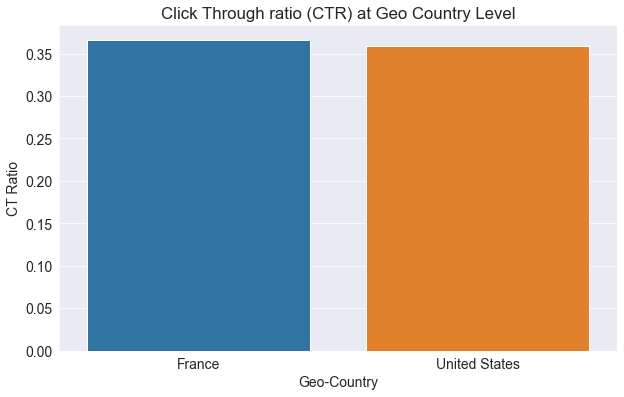

In [55]:
# Plotting Click Ratio

ax = sns.barplot(x=click_ratio.index, y=click_ratio['sessn_id']);
ax.set_title("Click Through ratio (CTR) at Geo Country Level")
ax.set_ylabel('CT Ratio')
ax.set_xlabel('Geo-Country')
plt.show()


Note : There is not much difference in terms of Click Ratio for both countries available here.

# Task 6.b


What is the trend of the distinct count of visitors on an evnt_dt level? Display your answer in the best possible graph

In [56]:
# Unique Values at `evnt_dt` level

fyttlyf_data['evnt_dt'].unique()

array(['2021-02-02T00:00:00.000000000'], dtype='datetime64[ns]')

Note : We don't have any varition of data at evnt_dt level like different time aspect or different date aspect. Its not possible to show any kind of trend with respect to that.



More Data Required : Date Variation, Time Variation

# Task 6.c

Which browser type get the highest click sessions & on which evnt_dt?

In [57]:
# Selecy data with Event == Click
click_session_data = fyttlyf_data[fyttlyf_data['Event'] == 'Click']

# Grouping with Browser Type
highest_click_session = click_session_data.groupby(['browser_type']).count()[['Event']]
highest_click_session = highest_click_session.sort_values(by='Event',ascending=False) # Sorting
highest_click_session.T


browser_type,Chrome Mobile,Chrome,Safari,Firefox,Edge,Samsung Browser,Internet Explorer,Opera Mobile,MIUI Browser,Amazon Silk,...,Puffin,HeyTap Browser,BlackBerry Browser,Opera Mini,Iron,Vivaldi,Maxthon,Pale Moon,Nokia S60 Browser,Yandex.Browser
Event,10510,8784,7322,2805,2473,1410,165,111,73,27,...,4,3,3,2,2,1,1,1,1,1


In [58]:
# Lables Names

highest_click_session.index.unique()

Index(['Chrome Mobile', 'Chrome', 'Safari', 'Firefox', 'Edge',
       'Samsung Browser', 'Internet Explorer', 'Opera Mobile', 'MIUI Browser',
       'Amazon Silk', 'Opera', 'Android Browser', '#', 'Opera Touch',
       'UC Browser', 'Puffin', 'HeyTap Browser', 'BlackBerry Browser',
       'Opera Mini', 'Iron', 'Vivaldi', 'Maxthon', 'Pale Moon',
       'Nokia S60 Browser', 'Yandex.Browser'],
      dtype='object', name='browser_type')

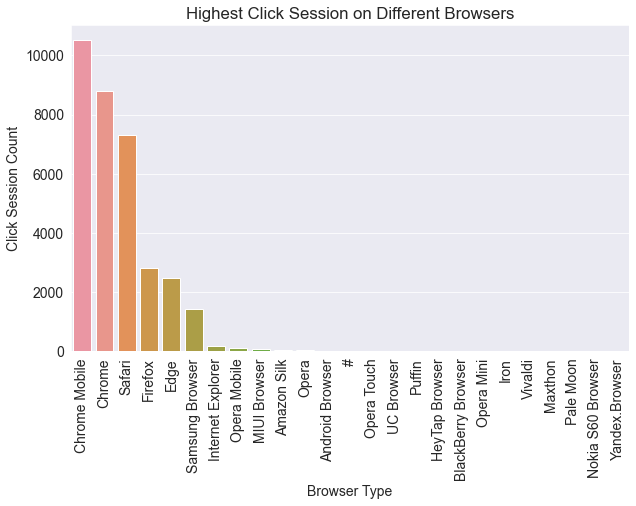

In [59]:
# Highest Click Session Graph

ax = sns.barplot(x=highest_click_session.index,y=highest_click_session['Event'])
ax.set_xticklabels(labels= ['Chrome Mobile', 'Chrome', 'Safari', 'Firefox', 'Edge',
       'Samsung Browser', 'Internet Explorer', 'Opera Mobile', 'MIUI Browser',
       'Amazon Silk', 'Opera', 'Android Browser', '#', 'Opera Touch',
       'UC Browser', 'Puffin', 'HeyTap Browser', 'BlackBerry Browser',
       'Opera Mini', 'Iron', 'Vivaldi', 'Maxthon', 'Pale Moon',
       'Nokia S60 Browser', 'Yandex.Browser'], rotation=90)
ax.set_title("Highest Click Session on Different Browsers")
ax.set_xlabel("Browser Type")
ax.set_ylabel("Click Session Count")
plt.show()


Note : For Event as Click sessions we saw that Chrome Mobile as Browser Type got the highest clicks.



# Summary Task 6


There is not much difference in terms of Click Ratio for both countries available here.


For France the ratio is 0.365698 which means 36 click per 100 impression.


For United States the ratio is 0.359189 which means 35 click per 100 impression

We don't have any varition of data at evnt_dt level like set of different time aspect or different date aspect. Hence it's not possible to show any kind of trend with respect to that.


For Event as Click sessions we saw that Chrome Mobile as Browser Type got the highest clicks.


# Task 7


Please briefly describe the latest Data science project you did in less than 500 words.



In this project we’re exploring my personal Spotify usage. Spotify is one the most famous and popular music streaming platforms available. I downloaded this dataset from Spotify's Privacy Setting section, which allows anyone to download their personal usage data. With this dataset I tried to analyse my streaming history to gain some useful insights.



First step required us to download the dataset and pre-processing. The downloaded dataset came in multiple files and in json format. I used the pd.read_json and pd.concat method to load and merge the dataset. After merging I had to seperate the datetime components into several columns like day,time,hour etc. I took help of the pd.to_datetime method to separate the components and get usable column values. And with this I finished the formatting and cleaning process.



Next comes the Exploratory Data Analysis part which is the most important part of any project. This is getting hands down part with the given dataset and knowing in-out of it. As this dataset does not contain much statistical data, we can directly jump to exploring different columns and their distribution. I used functions like nunique count, groupby, sum, sort_values and more to calculate the tables and values. And based on those results I plotted graphs with help of seaborn and matplotlib.

First, I explored the Artist column and checked the Unique Artist in my dataset. I got to know what percentage of my playlist has Unique Artists and Top 10 Artists. Then I explored the Song Tracks column for the similar Unique Songs and Top 10 Songs insights. Finally I came to the actual usage statistics, I explored Day Wise Usage, Average Usage In a Year and Average Usage In a Day. I got useful insights like that I mostly use Spotify on Fridays, my maximum usage over a day is in between 4 PM - 6 PM and April is the peak month of my yearly usage.

Then comes the Asking and Answering Questions part where we set aside a lot of questions before downloading our dataset. I tried to answer the questions with the help of the dataset if possible and also curated some random playlist for my future usage. Some of the questions are:



1.How many hours have I spent on Spotify Streaming since the day I signed up for it?


2.What is the average number of songs I played daily ?


3.On which day did I play the maximum number of songs ? Plot a scatter plot to show all the dates.

4.Who are my favourite 100 Artists ? Make a My Favourite Artist playlist for the user.


5.What are My Favourite 100 Songs ?


Then we came to the last part of our project Inferences and Conclusions, where we summarise the results we got over the whole process. These are some unique and useful insights which I can use to know my usage as well as for spotify which can use this for making the application more user friendly. Some of the useful insights are:



I have played songs of 2359 Unique Artists which comprises 21.83 % of total artists in my streaming history,I have played 4068 Unique Songs which comprises 37.65 % of total songs in my streaming history.
Of all the days, I'm most active on Spotify on Fridays.
My most active hours range from 8 AM to 7 PM. Maximum around 4PM-5PM hour period and Minimum at12AM-1PM hour period.
I played 39 songs on average per day.
On 21st April 2021 I played 390 Songs which is my personal maximum.
Since the day I created my Spotify Account, I have played the most songs in April 2021.
I have spent almost 369 hours streaming on spotify till now. That's about 5.5% of the possible 6688.5 hours
My favourite artist whom I've played with the most is Lauv. While my favourite song is bitches broken hearts by Billie Eilish


# Thank you